# 第十七课 应用Logistic Regression逻辑回归建模


Python零基础学习建模：https://www.ixigua.com/home/77346806707?utm_source=xiguastudio

Python源文件及数据下载链接: https://pan.baidu.com/s/1yuNlG6u9_C31fzhzbzqASA 提取码: ebrh

-Binary Output Variable: This might be obvious as we have already mentioned it, but logistic regression is intended for binary (two-class) classification problems. It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification.

-Remove Noise

-Remove Correlated Inputs

-Gaussian Distribution

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [204]:
data=pd.read_csv('Lesson17-diabetes.csv')

In [225]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [226]:
X=data.iloc[:,:-1]

In [228]:
y=data.iloc[:,-1]

In [229]:
X.shape

(768, 8)

In [230]:
y.count()

768

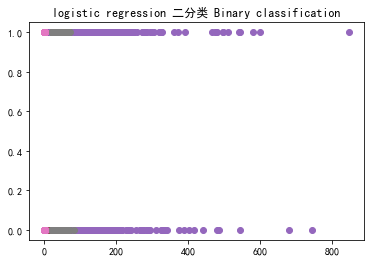

In [231]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plt.plot(X,y,'o')
plt.title('logistic regression 二分类 Binary classification') #二分类 Binary classification
plt.show()

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [233]:
X_train.shape

(537, 8)

In [234]:
X_test.shape

(231, 8)

In [235]:
logregression=LogisticRegression()

In [236]:
logregression.fit(X_train,y_train)

C:\Users\raymond\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [237]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [238]:
y_predict=logregression.predict(X_test)

### 什么是准确率Accuracy？

In [239]:
print('Accuracy of logistic regression classifier on diabetes: {:.3f}'.format(logregression.score(X_test, y_test)))

Accuracy of logistic regression classifier on diabetes: 0.779


In [240]:
logregression.score(X_test, y_test) #(141+39)/(141+39+16+35)=180/231

0.7792207792207793

In [241]:
X_test.shape

(231, 8)

### 什么是confusion_matrix？

In [242]:
confusion_matrix(y_test,y_predict)

array([[141,  16],
       [ 35,  39]], dtype=int64)

### 计算 precision, recall, F-measure and support

In [243]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))  

#precision=141/(141+35) 39/(39+16)
#recall=141/(141+16) 39/(35+39)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [244]:
print(logregression.coef_)

[[ 0.08528174  0.03447239 -0.01082118  0.00636563 -0.0013322   0.08853002
   0.73271631  0.02415018]]


In [245]:
print(logregression.intercept_)

[-8.60540028]


### 什么是ROC Curve？

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate and False Positive Rate

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

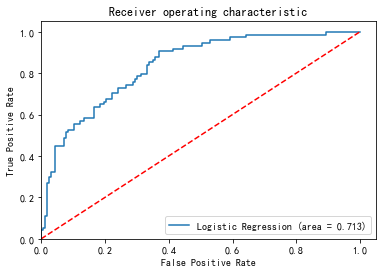

In [246]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logrocauc = roc_auc_score(y_test, logregression.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logregression.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % logrocauc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [247]:
logrocauc 

0.7125580995007746

In [248]:
fpr

array([0.        , 0.        , 0.        , 0.00636943, 0.00636943,
       0.01273885, 0.01273885, 0.01910828, 0.01910828, 0.02547771,
       0.02547771, 0.03184713, 0.03184713, 0.04458599, 0.04458599,
       0.07006369, 0.07006369, 0.07643312, 0.07643312, 0.08280255,
       0.08280255, 0.10191083, 0.10191083, 0.12101911, 0.12101911,
       0.13375796, 0.13375796, 0.1656051 , 0.1656051 , 0.18471338,
       0.18471338, 0.19745223, 0.19745223, 0.20382166, 0.20382166,
       0.22292994, 0.22292994, 0.24203822, 0.24203822, 0.26751592,
       0.26751592, 0.2866242 , 0.2866242 , 0.29299363, 0.29299363,
       0.29936306, 0.29936306, 0.31210191, 0.31210191, 0.33121019,
       0.33121019, 0.33757962, 0.33757962, 0.35031847, 0.35031847,
       0.3566879 , 0.3566879 , 0.36942675, 0.36942675, 0.41401274,
       0.41401274, 0.44585987, 0.44585987, 0.50318471, 0.50318471,
       0.52866242, 0.52866242, 0.59235669, 0.59235669, 0.6433121 ,
       0.6433121 , 0.89171975, 0.89171975, 1.        ])

In [249]:
tpr

array([0.        , 0.01351351, 0.04054054, 0.04054054, 0.05405405,
       0.05405405, 0.10810811, 0.10810811, 0.27027027, 0.27027027,
       0.2972973 , 0.2972973 , 0.32432432, 0.32432432, 0.44594595,
       0.44594595, 0.48648649, 0.48648649, 0.51351351, 0.51351351,
       0.52702703, 0.52702703, 0.55405405, 0.55405405, 0.56756757,
       0.56756757, 0.58108108, 0.58108108, 0.63513514, 0.63513514,
       0.64864865, 0.64864865, 0.66216216, 0.66216216, 0.67567568,
       0.67567568, 0.7027027 , 0.7027027 , 0.72972973, 0.72972973,
       0.74324324, 0.74324324, 0.75675676, 0.75675676, 0.77027027,
       0.77027027, 0.78378378, 0.78378378, 0.7972973 , 0.7972973 ,
       0.83783784, 0.83783784, 0.85135135, 0.85135135, 0.86486486,
       0.86486486, 0.87837838, 0.87837838, 0.90540541, 0.90540541,
       0.91891892, 0.91891892, 0.93243243, 0.93243243, 0.94594595,
       0.94594595, 0.95945946, 0.95945946, 0.97297297, 0.97297297,
       0.98648649, 0.98648649, 1.        , 1.        ])